In [0]:
# Assignment 20: Pandas part 2
# Work with Urbana station data from Wednesday night storms
# Aditya Vikram Gupta (avgupta3)

In [0]:
# >> A: Import needed modules -
#       NumPy, Matplotlib, and (now) Pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# >> B: Get wind/precipitation data file
#  1. URL: rfd.atmos.uiuc.edu/305/Data/skyApr8.csv
#  2. Grab with wget (or wget -N -q to not reload if already have it, and 'quiet' mode)
#  3. Use 'head -4' as we did in assignment 19 to see the first few lines of text.
#     The first column should be device_id, which is always 17426.
!wget -N -q rfd.atmos.uiuc.edu/305/Data/skyApr8.csv
!head -4 skyApr8.csv

"device_id","type","bucket_step_minutes","timestamp","lux","uv","precip","wind_lull","wind_avg","wind_gust","wind_dir","battery","report_interval","solar_radiation","local_daily_precip","precip_type","wind_interval","precip_final","local_daily_precip_final","precip_analysis_type"
17426,obs_sky,1,1586304000,2046,0.08,0,0.49,2.12,3.84,235,3.07,1,17,10.575281,0,3,0,0,1,
17426,obs_sky,1,1586304060,1956,0.08,0,0.89,1.97,3.4,236,3.07,1,16,10.575281,0,3,0,0,1,
17426,obs_sky,1,1586304120,1880,0.07,0,1.74,3.32,4.92,237,3.07,1,15,10.575281,0,3,0,0,1,


In [3]:
# >> C: Read the 'sky' wind/precipitation data
#  1. Read with Pandas read_csv(), into Pandas series named 'sky'
#  2. Check the data with sky.head().  There's a problem.
#     "bucket_step_minutes" should always be 1.  The columns
#     are misaligned.  Google this: pandas read csv index_col
#     ... and find out how to add the 'index_col' argument; there is
#     no index column here!  After fixing your read_csv(),
#         bucket_step_minutes will always be 1.
#  3. Add a name to the sky data object with: sky.name = 'Sky'
sky = pd.read_csv('skyApr8.csv', index_col=False)
sky.name = 'Sky'
sky.head()

,device_id,type,bucket_step_minutes,timestamp,lux,uv,precip,wind_lull,wind_avg,wind_gust,wind_dir,battery,report_interval,solar_radiation,local_daily_precip,precip_type,wind_interval,precip_final,local_daily_precip_final,precip_analysis_type
0,17426,obs_sky,1,1586304000,2046,0.08,0.0,0.49,2.12,3.84,235,3.07,1,17,10.575281,0.0,3.0,0.0,0.0,1
1,17426,obs_sky,1,1586304060,1956,0.08,0.0,0.89,1.97,3.40,236,3.07,1,16,10.575281,0.0,3.0,0.0,0.0,1
2,17426,obs_sky,1,1586304120,1880,0.07,0.0,1.74,3.32,4.92,237,3.07,1,15,10.575281,0.0,3.0,0.0,0.0,1
3,17426,obs_sky,1,1586304180,1782,0.07,0.0,1.03,2.07,3.53,233,3.07,1,14,10.575281,0.0,3.0,0.0,0.0,1
4,17426,obs_sky,1,1586304240,1692,0.07,0.0,0.76,1.72,3.49,228,3.07,1,14,10.575281,0.0,3.0,0.0,0.0,1


In [4]:
# >> D: Get and read the 'air' temperature / humidity data
#  1. Get this file: rfd.atmos.uiuc.edu/305/Data/airApr8.csv
#  2. Read with pandas as you did before, but into array "air"
#  3. Name the data object Air
#  4. Get a quick look at start of data with .head()
!wget -N -q rfd.atmos.uiuc.edu/305/Data/airApr8.csv
air = pd.read_csv('airApr8.csv', index_col=False)
air.name = 'Air'
air.head()

,device_id,type,bucket_step_minutes,timestamp,pressure,temperature,humidity,strike_count,strike_distance,battery,report_interval
0,17424,obs_air,1,1586304000,979.8,24.6,50,0,0,3.43,1
1,17424,obs_air,1,1586304060,979.7,24.6,50,0,0,3.43,1
2,17424,obs_air,1,1586304120,979.8,24.6,50,0,0,3.43,1
3,17424,obs_air,1,1586304180,979.8,24.6,50,0,0,3.43,1
4,17424,obs_air,1,1586304240,979.8,24.5,50,0,0,3.43,1


In [5]:
# >> E: Get a quick summary of both data sets 
#  1. Use array.describe() for each, in separate cells.
sky.describe()

,device_id,bucket_step_minutes,timestamp,lux,uv,precip,wind_lull,wind_avg,wind_gust,wind_dir,battery,report_interval,solar_radiation,local_daily_precip,precip_type,wind_interval,precip_final,local_daily_precip_final,precip_analysis_type
count,1437.0,1437.0,1.437000e+03,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.0,1437.000000,1437.000000,1436.000000,1436.0,1437.000000,1437.000000,1437.0
mean,17426.0,1.0,1.586347e+09,22478.924843,1.028727,0.010386,0.236521,0.871614,1.778372,159.411969,3.058754,1.0,187.044537,2.603296,0.091226,3.0,0.006422,0.244545,1.0
std,0.0,0.0,2.490662e+04,38015.470873,1.750914,0.080571,0.372545,0.696538,1.180634,102.064074,0.010709,0.0,316.652551,4.625140,0.487509,0.0,0.049817,1.333732,0.0
min,17426.0,1.0,1.586304e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.040000,1.0,0.000000,0.000000,0.000000,3.0,0.000000,0.000000,1.0
25%,17426.0,1.0,1.586326e+09,0.000000,0.000000,0.000000,0.000000,0.260000,0.980000,46.000000,3.050000,1.0,0.000000,0.000000,0.000000,3.0,0.000000,0.000000,1.0
50%,17426.0,1.0,1.586347e+09,194.000000,0.000000,0.000000,0.000000,0.800000,1.740000,217.000000,3.060000,1.0,1.000000,0.000000,0.000000,3.0,0.000000,0.000000,1.0
75%,17426.0,1.0,1.586369e+09,17722.000000,0.770000,0.000000,0.490000,1.380000,2.460000,239.000000,3.070000,1.0,147.000000,0.015565,0.000000,3.0,0.000000,0.000000,1.0
max,17426.0,1.0,1.586390e+09,117359.000000,5.380000,1.330013,2.440000,5.320000,11.530000,358.000000,3.080000,1.0,977.000000,14.925384,3.000000,3.0,0.822347,9.228365,1.0


In [6]:
air.describe()

,device_id,bucket_step_minutes,timestamp,pressure,temperature,humidity,strike_count,strike_distance,battery,report_interval
count,1433.0,1433.0,1.433000e+03,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1431.000000,1433.0
mean,17424.0,1.0,1.586347e+09,980.904466,20.401675,57.461968,0.071179,0.247034,3.436499,1.0
std,0.0,0.0,2.485505e+04,1.902808,4.378633,11.126940,0.593693,1.736188,0.006051,0.0
min,17424.0,1.0,1.586304e+09,975.300000,14.200000,29.000000,0.000000,0.000000,3.420000,1.0
25%,17424.0,1.0,1.586326e+09,980.000000,16.100000,51.000000,0.000000,0.000000,3.430000,1.0
50%,17424.0,1.0,1.586347e+09,980.900000,20.100000,60.000000,0.000000,0.000000,3.440000,1.0
75%,17424.0,1.0,1.586369e+09,982.300000,24.100000,66.000000,0.000000,0.000000,3.440000,1.0
max,17424.0,1.0,1.586390e+09,983.900000,27.700000,76.000000,8.000000,14.000000,3.450000,1.0


In [7]:
# >> F: Scale wind and temp data
#  1. The temperature data is degrees C. Convert it to deg. F.
#       You can use air.temperature = air.temperature * ...
#  2. Wind data is in meters per second.  Convert to mph.
#       Do this for three fields: wind lull (minimum 3 second sample),
#       wind avg (average over 1 minute), and gust columns. 
#  3. Remember which data arrays (Pandas objects) contain
#       which data columns!
#  4. Note this changes the data, so if you have to run this
#       cell more than once, you must re-read the CSV files
#       by rerunning one of the earlier Jupyter cells.
#  5. Print out the (new) max temperature and max wind gust.
#       You should find 81.86 deg. F, and 25.757 mph.
#       Trees shielded the wind; Willard airport had 59 mph.
!wget -q rfd.atmos.uiuc.edu/305/Data/airApr8.csv
air = pd.read_csv('airApr8.csv', index_col=False)
air.name = 'Air'

!wget -q rfd.atmos.uiuc.edu/305/Data/skyApr8.csv
sky = pd.read_csv('skyApr8.csv', index_col=False)
sky.name = 'Sky'

air.temperature = (air.temperature*9/5)+32
sky.wind_lull = sky.wind_lull*2.23694
sky.wind_avg = sky.wind_avg*2.23694
sky.wind_gust = sky.wind_gust*2.23694

print('New max temp: %f' % np.max(air.temperature))
print('New max wind gust: %f' % np.max(sky.wind_gust))

New max temp: 81.860000
New max wind gust: 25.791918


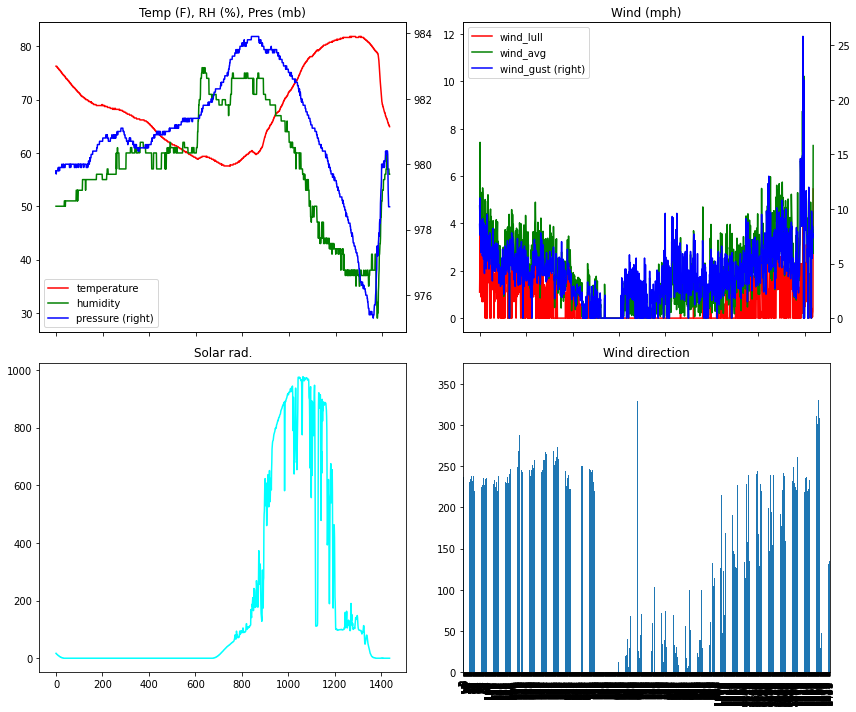

In [18]:
# >> G: Make a 2-row, 2-column plot.
#  1. Use Pandas .plot() -- not plt.plot
#  2. Top left: plot Three (!) fields using air['columnName'].plot() --
#        or, equivalently, use: air.columnName.plot() --
#     a) temperature (in red, figure out how, similar to matplotlib!)
#     b) humidity (this is RH) in green;
#     c) pressure (blue), and also add in plot(): secondary_y=True to use 2nd axis
#     d) add arguments ",legend=True" inside each of three .plot()
#     e) add title 'Temp (F), RH (%), Pres (mb)'
#  3. Top right: plot 3 fields - wind lull, average and gust; choose 
#       varied colors to make these look distinct.  Add title 'Wind (mph)'
#       * Also: again, add legend=True to all three plot() statements.
#  4. Bottom left: you choose a different field.  Add a title!
#  5. Bottom right: wind direction, with kind='bar' (you choose color; add title)
#     * the x-axis for direction will be a mess - that's okay.
#  6. Go back and preface code with: plt.figure( figsize=...for larger fig, you choose size)
#  7. Finish with tight_layout
#  The arrival of the storms should be clear with the temperature drop,
#    the jump in humidity and pressure, and the wind gust.

plt.figure(figsize=(12,10))

plt.subplot(2,2,1); 
air.temperature.plot(color='red', legend=True); 
air.humidity.plot(color='green',legend=True); 
air.pressure.plot(color='blue', secondary_y=True, legend=True)
plt.title('Temp (F), RH (%), Pres (mb)')

plt.subplot(2,2,2); 
sky.wind_lull.plot(color='red', legend=True); 
sky.wind_avg.plot(color='green',legend=True); 
sky.wind_gust.plot(color='blue', secondary_y=True, legend=True)
plt.title('Wind (mph)')

plt.subplot(2,2,3); 
sky.solar_radiation.plot(color='cyan'); 
#air.humidity.plot(color='green',legend=True); 
#air.pressure.plot(color='blue', secondary_y=True, legend=True)
plt.title('Solar rad.')

plt.subplot(2,2,4); 
sky.wind_dir.plot(kind='bar'); 
#air.humidity.plot(color='green',legend=True); 
#air.pressure.plot(color='blue', secondary_y=True, legend=True)
plt.title('Wind direction')

plt.tight_layout()


In [19]:
# >> H: Let's finally merge our two data sets into one DataFrame.
#  1. Info: https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
#  2. In our case, do this:  df = pd.merge(air,sky, on='timestamp')
#     df is our Pandas DataFrame object.  on= specifies the Merge Key.
#  3. Finish the cell with a line that just contains: df
#     ... this prints the start and end of the data.
#     ... there should be 1432 rows and 30 columns.
#  Going forward, we can now view df['temperature'] or df.wind_gust, etc.

df = pd.merge(air, sky, on='timestamp')
df

,device_id_x,type_x,bucket_step_minutes_x,timestamp,pressure,temperature,humidity,strike_count,strike_distance,battery_x,report_interval_x,device_id_y,type_y,bucket_step_minutes_y,lux,uv,precip,wind_lull,wind_avg,wind_gust,wind_dir,battery_y,report_interval_y,solar_radiation,local_daily_precip,precip_type,wind_interval,precip_final,local_daily_precip_final,precip_analysis_type
0,17424,obs_air,1,1586304000,979.8,76.28,50,0,0,3.43,1,17426,obs_sky,1,2046,0.08,0.000000,1.096101,4.742313,8.589850,235,3.07,1,17,10.575281,0.0,3.0,0.000000,0.000000,1
1,17424,obs_air,1,1586304060,979.7,76.28,50,0,0,3.43,1,17426,obs_sky,1,1956,0.08,0.000000,1.990877,4.406772,7.605596,236,3.07,1,16,10.575281,0.0,3.0,0.000000,0.000000,1
2,17424,obs_air,1,1586304120,979.8,76.28,50,0,0,3.43,1,17426,obs_sky,1,1880,0.07,0.000000,3.892276,7.426641,11.005745,237,3.07,1,15,10.575281,0.0,3.0,0.000000,0.000000,1
3,17424,obs_air,1,1586304180,979.8,76.28,50,0,0,3.43,1,17426,obs_sky,1,1782,0.07,0.000000,2.304048,4.630466,7.896398,233,3.07,1,14,10.575281,0.0,3.0,0.000000,0.000000,1
4,17424,obs_air,1,1586304240,979.8,76.10,50,0,0,3.43,1,17426,obs_sky,1,1692,0.07,0.000000,1.700074,3.847537,7.806921,228,3.07,1,14,10.575281,0.0,3.0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,17424,obs_air,1,1586390100,978.7,65.30,57,0,0,3.45,1,17426,obs_sky,1,52,0.00,0.040307,0.156586,3.109347,5.614719,133,3.08,1,0,14.825672,1.0,3.0,0.024922,9.166713,1
1428,17424,obs_air,1,1586390160,978.7,65.30,57,0,0,3.45,1,17426,obs_sky,1,55,0.00,0.066214,0.044739,3.735690,8.410894,134,3.08,1,0,14.891886,3.0,3.0,0.040940,9.207653,1
1429,17424,obs_air,1,1586390220,978.7,65.12,56,0,0,3.45,1,17426,obs_sky,1,55,0.00,0.027814,0.178955,2.952761,7.314794,132,3.08,1,0,14.919700,1.0,3.0,0.017197,9.224851,1
1430,17424,obs_air,1,1586390280,978.7,65.12,56,0,0,3.45,1,17426,obs_sky,1,55,0.00,0.005684,0.290802,2.729067,7.695074,135,3.08,1,0,14.925384,1.0,3.0,0.003514,9.228365,1


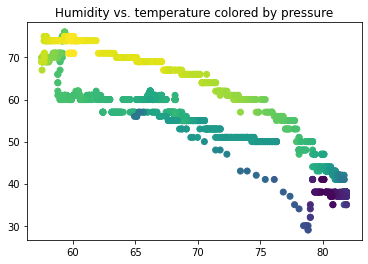

In [28]:
# >> I: Make a scatter plot with Matplotlib
#  1. Use plt.scatter between the temperature and humidity.
#  2. Add the c= argument to specify a field to color the
#       dots with (pressure works, or choose another)
#  3. Use plt.xlabel, ylabel appropriately
#  4. Add a title: ___ vs. ___ colored by ___

plt.scatter(df['temperature'], df['humidity'], c= df['pressure']);
plt.title('Humidity vs. temperature colored by pressure');

In [31]:
# >> J: Make another scatter plot, this time with plotly
# Plot the same fields as a scatterplot, using a different package:  plotly.
#  1. Reference:  https://plotly.com/python/px-arguments/  
#  2. You need this code:
#       import plotly.express as px
#       px.scatter(df, x=df.temperature, y=df.humidity, color=df.YouChoose, size=df.YouChoose)
#     ... replace the first YouChoose with the c= field from your prior matplotlib scatter()
#     ... replace the second YouChoose with another field - used for icon size!
#  I used temperature, humidity, pressure and wind_gust, for example.

import plotly.express as px
px.scatter(df, x=df.temperature, y=df.humidity, color=df.pressure, size=df.wind_gust)

In [0]:
# End of assignment 20.